# Logistic Regression with Python

### Implementing Logistic Regression in Python for classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv("titanic.csv")

In [3]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
d.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
d.shape

(891, 12)

In [6]:
d.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
d.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
d.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Slayter, Miss. Hilda Mary",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
d.ndim

2

In [11]:
d=d.set_index("PassengerId")


In [12]:
drop_column=["Name","Ticket"]
d.drop(drop_column,axis=1,inplace=True)

In [13]:
d.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

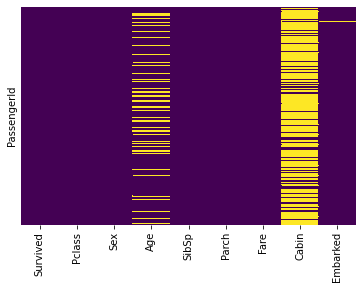

In [14]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement
with some form of imputation. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

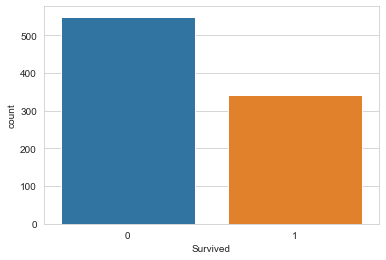

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=d)

<AxesSubplot:xlabel='Survived', ylabel='count'>

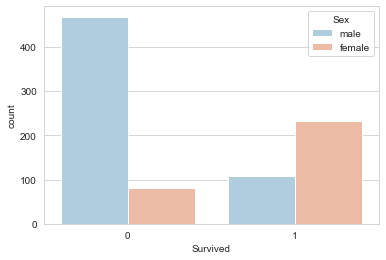

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=d,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

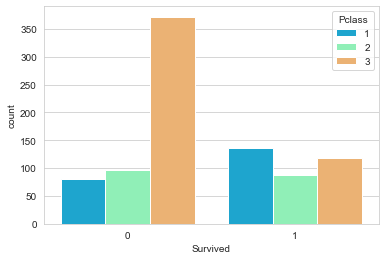

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=d,palette='rainbow')

<AxesSubplot:xlabel='Age'>

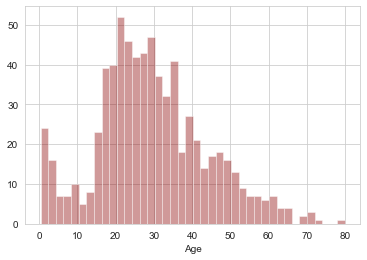

In [18]:
sns.distplot(d['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

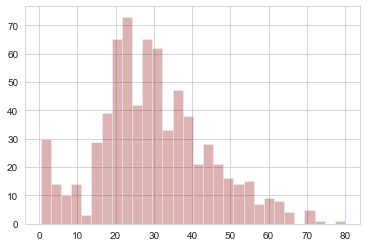

In [19]:
d['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

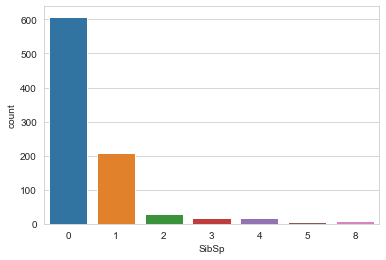

In [20]:
sns.countplot(x='SibSp',data=d)

<AxesSubplot:>

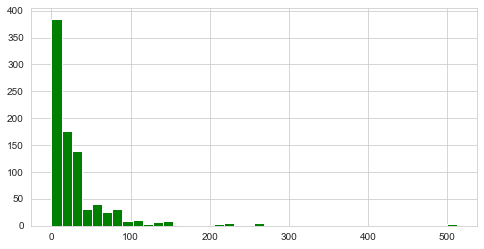

In [21]:
d['Fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

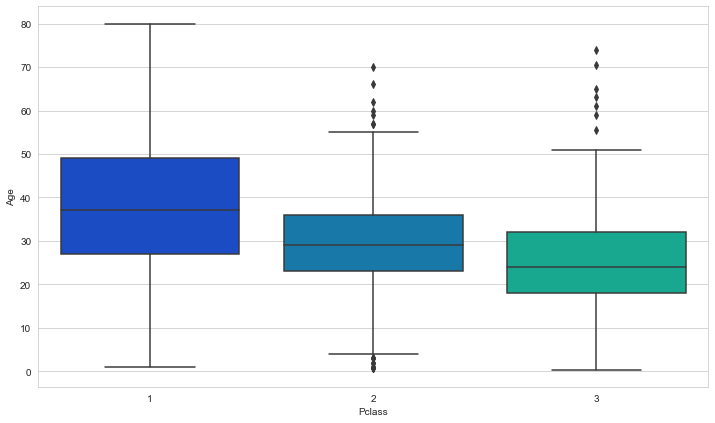

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=d,palette='winter')

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [24]:
d['Age'] = d[['Age','Pclass']].apply(impute_age,axis=1)

# Check that heat map again!

<AxesSubplot:ylabel='PassengerId'>

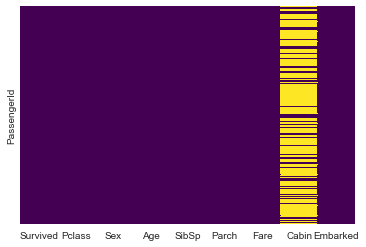

In [25]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
d.drop('Cabin',axis=1,inplace=True)

# check again for missing values

<AxesSubplot:ylabel='PassengerId'>

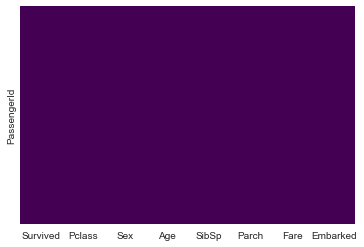

In [27]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
d.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [29]:
#d["Age"].fillna(int(d["Age"].mean()),inplace=True)

<AxesSubplot:xlabel='Pclass', ylabel='Embarked'>

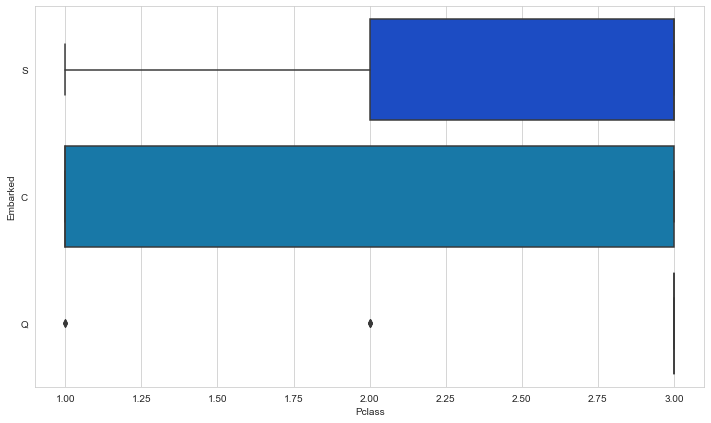

In [30]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Embarked',data=d,palette='winter')

In [31]:
d["Embarked"].fillna("Q",inplace=True)

In [32]:
d.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,24.0,1,2,23.4500,S


In [34]:
d1=d.copy()

In [35]:
d1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [36]:
d1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,13.00,S
888,1,1,female,19.0,0,0,30.00,S
889,0,3,female,24.0,1,2,23.45,S
890,1,1,male,26.0,0,0,30.00,C
891,0,3,male,32.0,0,0,7.75,Q


In [37]:
d["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [38]:
d["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [39]:
d["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
d["Age"].value_counts()

24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
        ... 
55.50      1
74.00      1
0.92       1
70.50      1
12.00      1
Name: Age, Length: 88, dtype: int64

In [41]:
d["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [42]:
d["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [43]:
d["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [44]:
d["Embarked"].value_counts()

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [45]:
d.duplicated().sum()

116

In [46]:
d.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

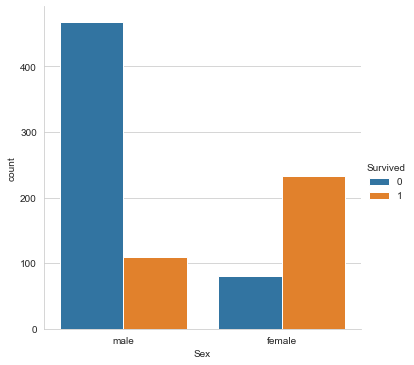

In [47]:
sns.catplot(x ="Sex", hue ="Survived",kind ="count", data = d)

In [48]:
group = d.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Age (Continuous Feature) vs Survived  

<AxesSubplot:xlabel='Sex', ylabel='Age'>

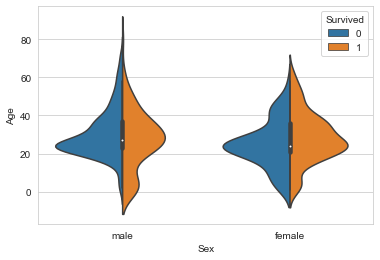

In [49]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = d, split = True)

# Bar Plot for Fare (Continuous Feature)  


<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

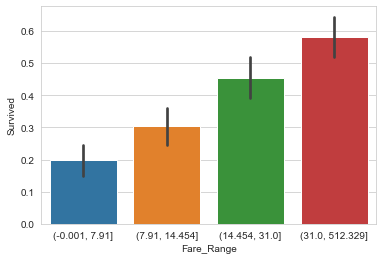

In [50]:
# Divide Fare into 4 bins equally based on the distribution of data
d['Fare_Range'] = pd.qcut(d['Fare'], 4)
 
# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',data = d)

# Categorical Count Plots for Embarked Feature  

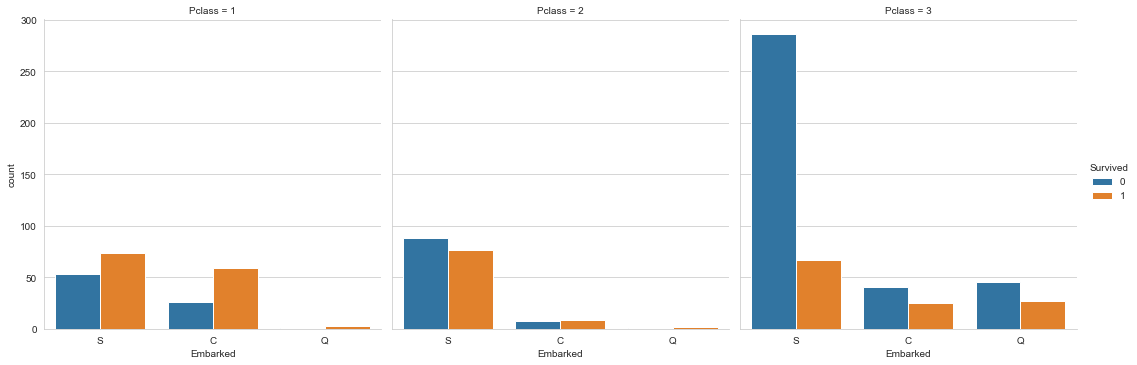

In [51]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = d)

In [52]:
# Conclusion :  

In [53]:
y=d["Survived"]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [54]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [55]:
d.drop("Survived",axis=1,inplace=True)

In [56]:
d

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Range
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,"(-0.001, 7.91]"
2,1,female,38.0,1,0,71.2833,C,"(31.0, 512.329]"
3,3,female,26.0,0,0,7.9250,S,"(7.91, 14.454]"
4,1,female,35.0,1,0,53.1000,S,"(31.0, 512.329]"
5,3,male,35.0,0,0,8.0500,S,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,"(7.91, 14.454]"
888,1,female,19.0,0,0,30.0000,S,"(14.454, 31.0]"
889,3,female,24.0,1,2,23.4500,S,"(14.454, 31.0]"


In [57]:
x=pd.get_dummies(d)
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Fare_Range_(-0.001, 7.91]","Fare_Range_(7.91, 14.454]","Fare_Range_(14.454, 31.0]","Fare_Range_(31.0, 512.329]"
PassengerId,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1,1,0,0,0
2,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1
3,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0
4,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1,0,1,0,0
888,1,19.0,0,0,30.0000,1,0,0,0,1,0,0,1,0
889,3,24.0,1,2,23.4500,1,0,0,0,1,0,0,1,0


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [60]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Fare_Range_(-0.001, 7.91]","Fare_Range_(7.91, 14.454]","Fare_Range_(14.454, 31.0]","Fare_Range_(31.0, 512.329]"
PassengerId,,,,,,,,,,,,,,
302,3,24.0,2,0,23.2500,0,1,0,1,0,0,0,1,0
310,1,30.0,0,0,56.9292,1,0,1,0,0,0,0,0,1
517,2,34.0,0,0,10.5000,1,0,0,0,1,0,1,0,0
121,2,21.0,2,0,73.5000,0,1,0,0,1,0,0,0,1
571,2,62.0,0,0,10.5000,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,3,19.0,0,0,7.6500,0,1,0,0,1,1,0,0,0
768,3,30.5,0,0,7.7500,1,0,0,1,0,1,0,0,0
73,2,21.0,0,0,73.5000,0,1,0,0,1,0,0,0,1


In [61]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"Fare_Range_(-0.001, 7.91]","Fare_Range_(7.91, 14.454]","Fare_Range_(14.454, 31.0]","Fare_Range_(31.0, 512.329]"
PassengerId,,,,,,,,,,,,,,
863,1,48.0,0,0,25.9292,1,0,0,0,1,0,0,1,0
224,3,24.0,0,0,7.8958,0,1,0,0,1,1,0,0,0
85,2,17.0,0,0,10.5000,1,0,0,0,1,0,1,0,0
681,3,24.0,0,0,8.1375,1,0,0,1,0,0,1,0,0
536,2,7.0,0,2,26.2500,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1,49.0,0,0,25.9292,1,0,0,0,1,0,0,1,0
816,1,37.0,0,0,0.0000,0,1,0,0,1,1,0,0,0
630,3,24.0,0,0,7.7333,0,1,0,1,0,1,0,0,0


In [62]:
y_train

PassengerId
302    1
310    1
517    1
121    0
571    1
      ..
716    0
768    0
73     0
236    0
38     0
Name: Survived, Length: 712, dtype: int64

In [63]:
y_test

PassengerId
863    1
224    0
85     1
681    0
536    1
      ..
797    1
816    0
630    0
422    0
449    1
Name: Survived, Length: 179, dtype: int64

In [64]:
x_train.shape

(712, 14)

In [65]:
y_train.shape

(712,)

In [66]:
x_test.shape

(179, 14)

In [67]:
y_test.shape

(179,)

In [68]:
l=LogisticRegression()
l.fit(x_train,y_train)
print("train test complete")

train test complete


In [69]:
l.score(x,y)

0.8058361391694725

In [70]:
l.score(x_train,y_train)

0.8061797752808989

In [71]:
l.score(x_test,y_test)

0.8044692737430168

In [72]:
y_pred=l.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [73]:
d1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
d1

,Actual,Predicted
PassengerId,,
863,1,1
224,0,0
85,1,1
681,0,1
536,1,1
...,...,...
797,1,1
816,0,0
630,0,0


In [74]:
c1=confusion_matrix(y_test,y_pred)
c1

array([[91, 15],
       [20, 53]], dtype=int64)

In [75]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,91,15
1,20,53


# THANK YOU